In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [3]:
DATADIR = r'P:\archive\dataset'
CATEGORIES = ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']
IMG_SIZE = 100

In [4]:
DATADIR

'P:\\archive\\dataset'

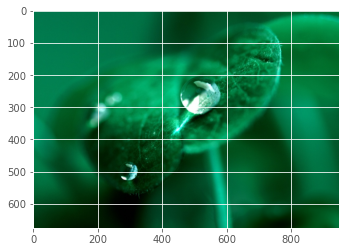

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

In [6]:
print(len(training_data))

6860


In [7]:
lenofimage = len(training_data)

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [9]:
X.shape

(6860, 30000)

In [10]:
X = X/255.0

In [11]:
X[1]

array([0.11372549, 0.2       , 0.15294118, ..., 0.24705882, 0.41176471,
       0.29019608])

In [12]:
y=np.array(y)

In [13]:
y.shape

(6860,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
X_train

array([[0.48235294, 0.4627451 , 0.4745098 , ..., 0.95686275, 0.95686275,
        0.95686275],
       [0.81960784, 0.71372549, 0.69803922, ..., 0.85490196, 0.78431373,
        0.77254902],
       [0.85490196, 0.74117647, 0.63529412, ..., 0.2627451 , 0.65882353,
        0.92941176],
       ...,
       [0.01568627, 0.01568627, 0.01568627, ..., 0.14901961, 0.14509804,
        0.12941176],
       [0.10196078, 0.21568627, 0.16470588, ..., 0.09803922, 0.16862745,
        0.15686275],
       [0.4745098 , 0.19215686, 0.00392157, ..., 0.70196078, 0.69411765,
        0.69411765]])

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [17]:
y2 = svc.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))
print(metrics.confusion_matrix(y_test, y2))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       175
           1       0.50      0.87      0.63       223
           2       0.44      0.19      0.27       110
           3       0.64      0.46      0.53       160
           4       0.65      0.49      0.56       152
           5       0.64      0.80      0.71       118
           6       0.44      0.32      0.37       136
           7       0.28      0.43      0.34        54
           8       0.74      0.59      0.65       277
           9       0.56      0.74      0.64       164
          10       0.53      0.36      0.43       146

    accuracy                           0.57      1715
   macro avg       0.55      0.54      0.53      1715
weighted avg       0.58      0.57      0.56      1715

[[122  11   3   1   9   8   5   4   2  10   0]
 [  1 193   0   1   2   1   1   0   4  18   2]
 [ 12  16  21   8   6  10   8   1   3  22   3]
 [  6  29   5  73   4   3  10   8   7  11   4]

In [19]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [20]:
result

,original,predicted
0,7,5
1,8,4
2,8,8
3,6,4
4,8,1
...,...,...
1710,9,1
1711,9,1
1712,0,0
1713,1,1


In [28]:
    model = MLPClassifier()
    model.fit(X_train, y_train)
    print(model)

    expected_y  = y_test
    predicted_y = model.predict(X_test)

MLPClassifier()


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
    print(metrics.classification_report(expected_y, predicted_y))
    print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74       175
           1       0.64      0.59      0.61       223
           2       0.34      0.31      0.33       110
           3       0.48      0.47      0.48       160
           4       0.54      0.49      0.51       152
           5       0.75      0.70      0.73       118
           6       0.34      0.10      0.16       136
           7       0.38      0.28      0.32        54
           8       0.50      0.76      0.60       277
           9       0.63      0.70      0.66       164
          10       0.36      0.46      0.40       146

    accuracy                           0.55      1715
   macro avg       0.53      0.50      0.50      1715
weighted avg       0.55      0.55      0.53      1715

[[116   3   9   5  15   5   4   1   9   7   1]
 [  2 132   0   5   3   0   1   0  53  16  11]
 [  5   5  34  15  10   2   4   3  18   8   6]
 [  2   9  12  76   6   3   4   4  22   9  13]

In [34]:
result = pd.DataFrame({'original' : expected_y,'predicted' : predicted_y})

In [35]:
result

,original,predicted
0,7,7
1,8,3
2,8,10
3,6,10
4,8,8
...,...,...
1710,9,1
1711,9,9
1712,0,6
1713,1,8


In [30]:
from sklearn.linear_model import LogisticRegression
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train, y_train) 

LogisticRegression(solver='liblinear')

In [31]:
predictions = logreg.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       175
           1       0.42      0.90      0.58       223
           2       0.60      0.16      0.26       110
           3       0.74      0.40      0.52       160
           4       0.63      0.38      0.47       152
           5       0.69      0.75      0.72       118
           6       0.32      0.17      0.22       136
           7       0.26      0.37      0.31        54
           8       0.65      0.55      0.59       277
           9       0.47      0.76      0.58       164
          10       0.38      0.29      0.33       146

    accuracy                           0.53      1715
   macro avg       0.54      0.49      0.48      1715
weighted avg       0.56      0.53      0.51      1715

[[116   3   9   5  15   5   4   1   9   7   1]
 [  2 132   0   5   3   0   1   0  53  16  11]
 [  5   5  34  15  10   2   4   3  18   8   6]
 [  2   9  12  76   6   3   4   4  22   9  13]

In [37]:
result = pd.DataFrame({'original' : expected_y,'predicted' : predicted_y})

In [38]:
result

,original,predicted
0,7,7
1,8,3
2,8,10
3,6,10
4,8,8
...,...,...
1710,9,1
1711,9,9
1712,0,6
1713,1,8
